In [50]:
import pandas as pd
import numpy as np
from scipy.io import loadmat
from sklearn.neighbors import KNeighborsClassifier
import time

In [72]:
# Load train data
train = loadmat('train_32x32.mat')
train

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Mon Dec  5 21:09:26 2011',
 '__version__': '1.0',
 '__globals__': [],
 'X': array([[[[ 33,  84,  19, ...,  92, 190, 216],
          [ 30,  76,  54, ...,  78, 188, 217],
          [ 38,  59, 110, ..., 101, 191, 212]],
 
         [[ 15,  86,  20, ...,  94, 205, 221],
          [ 23,  73,  52, ...,  82, 203, 222],
          [ 19,  66, 111, ..., 105, 206, 217]],
 
         [[ 15,  77,  25, ..., 114, 220, 226],
          [ 17,  78,  57, ..., 101, 218, 227],
          [ 19,  56, 116, ..., 125, 220, 221]],
 
         ...,
 
         [[ 72,  90,  65, ..., 200, 229, 200],
          [ 65,  78, 144, ..., 201, 231, 199],
          [ 56,  69, 223, ..., 203, 224, 191]],
 
         [[ 82,  88,  78, ..., 192, 229, 193],
          [ 77,  77, 148, ..., 193, 229, 188],
          [ 57,  67, 218, ..., 195, 224, 182]],
 
         [[ 89,  88,  98, ..., 190, 229, 197],
          [ 79,  78, 158, ..., 191, 228, 189],
          [ 59,  66, 220, 

In [33]:
# Get the features from train data
x_train = train['X'].transpose()
x_train.shape

(73257, 3, 32, 32)

In [12]:
# Get the labels from train data
y_train = train['y']
y_train.shape

(73257, 1)

In [16]:
# Load test data
test = loadmat('test_32x32.mat')

In [44]:
# Get the features from test data
x_test = test['X'].transpose()
x_test.shape

(26032, 3, 32, 32)

In [18]:
# Get the labels from test data
y_test = test['y']
y_test.shape

(26032, 1)

[1]


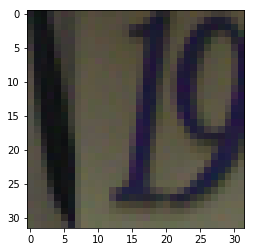

In [40]:
# See the first image from training set and what label that is
import matplotlib.pyplot as plt
%matplotlib inline  
show_img = x_train[0].transpose()
plt.imshow(show_img)
print(y_train[0])

[9]


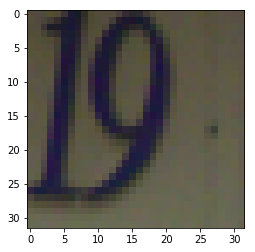

In [41]:
# See the second image from training set and what label that is
import matplotlib.pyplot as plt
%matplotlib inline  
show_img = x_train[1].transpose()
plt.imshow(show_img)
print(y_train[1])

[2]


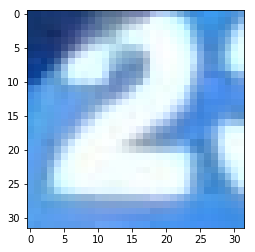

In [42]:
# See the third image from training set and what label that is
import matplotlib.pyplot as plt
%matplotlib inline  
show_img = x_train[2].transpose()
plt.imshow(show_img)
print(y_train[2])

In [66]:
# Flatten the matrices into one single vector
x_train = [x_train[i].flatten() for i in range(0,len(x_train))]
x_test = [x_test[i].flatten() for i in range(0,len(x_test))]

# Change the lists to numpy arrays
x_train = np.array(x_train)
x_test = np.array(x_test)

# Change numpy arrays to data frame
x_train = pd.DataFrame(x_train)
x_test = pd.DataFrame(x_test)
y_train = pd.DataFrame(y_train)
y_test = pd.DataFrame(y_test)

In [60]:
def knn_rate(xtrain,ytrain,xtest,ytest,k):
    """This function takes in a training dataset of features,
       a training dataset of labels, a testing dataset of features,
       a testing dataset of labels, and a specified number of 
       neighbors. It will run KNN algorithms on the training set,
       predict the testing set, compare the results with the true
       labels, and return success rate."""
    prediction = []
    count = 0
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(xtrain,np.ravel(ytrain,order='C'))
    accu_rate = knn.score(xtest,ytest)
    return accu_rate
        
    

In [ ]:
knn_rate(x_train,y_train,x_test,y_test,1)